In [38]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [42]:
MODEL = "0110"

#MODEL = "0144"

#PATH = "aorta_outlet"
#PATH  = "right_iliac_outlet"
#PATH  = "aorta"
PATH  = "right_iliac"

#PATH = "aorta"
#PATH = "celiac_hepatic"
#PATH = "celiac_splenic"
#PATH = "ext_iliac_left"
#PATH = "renal_left"
#PATH = "renal_right"
#PATH = "SMA"

CASE  = "sim_wom_rcr_real"

mesh  = "coarse"

gen   = 3

quants   = [
 "area",
 "radius_actual",
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

labels = [
    r"area $(cm^2)$",
    r"radius $(cm)$",
    r"pressure $(mmHg)$",
    r"TAWSS magnitude $(dyne/cm^2)$",
    r"Velocity magnitude $(cm/s)$"
]

models   = list(range(50))
dt       = 0.01

CSV    = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/csv/"+'/'+PATH+".csv"
                    
OUTPUT = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/"+str(gen)+"/"+PATH+"/avg"

io.mkdir(OUTPUT)

df = pd.read_csv(CSV)
df = df.loc[df['mesh']==mesh]
df = df.loc[df['generation'] == gen]

df['pressure_0'] = df['pressure_0']/1333

points = df['point'].unique()
print(points)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84]


In [43]:
df_mean = df.groupby(['point','model']).mean().groupby('point').mean()
df_std  = df.groupby(['point','model']).mean().groupby('point').std()

df_std['x'] = df_mean['x']
df_std['y'] = df_mean['y']
df_std['z'] = df_mean['z']

df_mean['path'] = PATH
df_std['path'] = PATH

df_mean.to_csv(OUTPUT+'/mean.csv')
df_std.to_csv(OUTPUT+'/std.csv')
print(df_mean)

       Unnamed: 0      area  generation    length        nx        ny  \
point                                                                   
0        259652.5  2.239731         3.0  5.457883  0.583976  0.155905   
1        259693.5  2.498141         3.0  6.000257  0.622972  0.129276   
2        259734.5  2.778611         3.0  6.709218  0.661968  0.102647   
3        259775.5  2.758482         3.0  7.032580  0.700964  0.076018   
4        259816.5  2.556519         3.0  7.364199  0.739960  0.049389   
5        259857.5  2.085796         3.0  7.634419  0.778956  0.022760   
6        259898.5  1.647070         3.0  6.357372  0.751056 -0.077414   
7        259939.5  1.551349         3.0  4.480136  0.723156 -0.177587   
8        259980.5  1.769658         3.0  4.732480  0.695255 -0.277761   
9        260021.5  2.030183         3.0  5.063789  0.667355 -0.377934   
10       260062.5  2.325953         3.0  5.416096  0.639455 -0.478108   
11       260103.5  2.668238         3.0  5.799788  

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


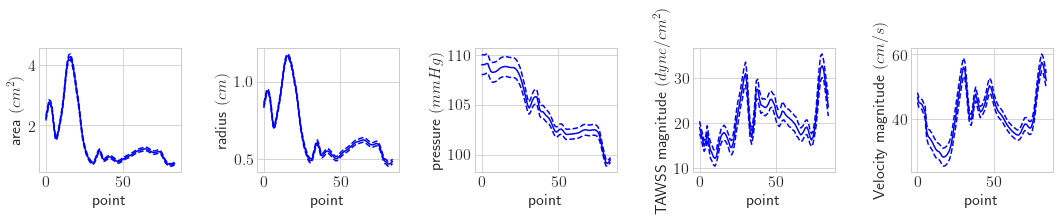

In [44]:
Size  = 3
count = 0
Wplot = len(labels)
f, axarr = plt.subplots(1, Wplot, figsize=(Wplot*Size,Size))
for i,q in enumerate(quants):

    Y = df_mean[q].values
    S = df_std[q].values
    X = range(len(Y))

    label = labels[i]

    
    axarr[i].plot(X,Y, color='b')
    axarr[i].plot(X,Y+2*S,color='b',linestyle='--')
    axarr[i].plot(X,Y-2*S,color='b',linestyle='--')
    axarr[i].set_xlabel("point")
    axarr[i].set_ylabel(label)
    axarr[i].legend()

plt.tight_layout()
plt.savefig(OUTPUT+'/avg.png'.format(q),dpi=300)
plt.savefig(OUTPUT+'/avg.pdf'.format(q),dpi=200)

plt.show()
plt.close()